<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Assignment_01_Multiclass_Classification_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Neural Networks for Analysis of Tabular Data**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **READ CAREFULLY**

The **_first_**  digit in your myUTSA ID (e.g. "abc123") will determine which dataset you are to analyze for this assignment and which type of neural network (i.e. classification or regression) you will need to construct. For example, if your myUTSA ID was **vue682**, then your first digit is the number `6`.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED** and you will automatically receive  **`1 point`** out of 100. Since you are only allowed a single submission, you will automatically fail this assignment.

If you are uncertain which dataset you should be working on, contact your Instructor for help. Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| First Digit myUTSA ID   | Dataset to Analyze     | Neural Network Type
--------------------------|-------------------------|-----------------
0                         | Hepatitis               | Binary Classification
1                         | Coimbra Breast Cancer   | Binary Classification
2                         | Parkinson Speech        | Binary Classification
3                         | Indian Liver            | Binary Classification
4                         | Fetal Health            | Multiclass Classification
5                         | Dermatology             | Multiclass Classification
6                         | Maternal Health         | Multiclass Classification
7                         | Bone Marrow Transplant  | Regression
8                         | German Breast Cancer    | Regression
9                         | Diabetes Progression    | Regression

#### **NOTE: You can only use this Colab notebook if the first digit of your _myUTSA_ ID  is between `4` and `6`.**

# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## **MAKE A COPY OF THIS NOTEBOOK!**

For your assignment to be graded, you **must** make a copy of this Colab notebook in your Google Drive and use this copy as your worksheet.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your Google Drive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this assignment.

In [9]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    Colab = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


Your GMAIL address **must** appear in the output in order for your work to be graded. If your GMAIL is not visible you will receive `1` point out of 100 for your grade. You will not be given a second chance to fix this problem!

# **Assignment 1: Multiclass Classification**

**Assignment_01** is specifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to build neural networks that can analyze tabular data stored in a Pandas DataFrame. These analyzes include: (1) binary classification, (2) multiclass classification and (3) regression.

You will use this Colab notebook **only** if the first digit in your myUTSA ID is between `4` and `6`. If that is correct, you have been assigned to perform **multiclass classification**.

Unlike your class lessons, you will **not** be given examples that you can use to simply copy-and-paste code. Rather, you will be given a problem to solve and it will be up to you to use code snippets that you have been given previously to solve different aspects of this assignment. And unlike your class lessons, your will **not** be given the correct output. In other words, this assignment is basically how you would solve an actual biomedical problem.

## **---AI WARNING---AI WARNING---AI WARNING---**

You are **NOT** allowed to use AI anywhere in your assignment. If you use AI you will receive a grade of only **1** out of 100 for this assignment. In other words, you will fail your assignment if you use AI.

If you encounter an error it probably means that you didn't read the instructions carefully. Your Instructor and TA's are here to help you fix any errors that you encounter. Don't lose a good grade in this course by using AI.

# **Multiclass Classification by Neural Networks**
**Multiclass classification** of tabular data is a type of supervised learning task where the goal is to categorize observations into one of three or more possible classes based on their attributes.

#### **Multiclass Classification:**
Multiclass classification deals with problems where there are multiple possible outcomes. Examples include:
1. **Disease Diagnosis:**
   - What type of diabetes does the patient have? (Type 1/Type 2/Gestational)
   - What stage is this breast tumor in? (Stage 0/Stage 1/Stage 2/Stage 3/Stage 4)
   - What type of hypertension does the patient have? (Primary/Secondary)
   - What variant of COVID-19 is the patient infected with? (Alpha/Beta/Delta/Omicron)
2. **Medical Outcomes:**
   - What is the prognosis for the patient after a heart attack? (Good/Fair/Poor)
   - What type of response will the patient have to a specific treatment? (Positive/Negative/Neutral)
   - What risk level does the patient have for developing heart disease? (Low/Medium/High)
3. **Medical Conditions and Symptoms:**
   - What type of depression is the patient experiencing? (Mild/Moderate/Severe)
   - What severity of sleep apnea does the patient have? (Mild/Moderate/Severe)
   - What is the patient's risk level for osteoporosis? (Low/Medium/High)
   - What genetic condition does the patient have a predisposition for? (Condition A/Condition B/Condition C)
4. **Medical Procedures:**
   - What type of surgery is recommended for this patient? (Surgery A/Surgery B/Surgery C)
   - What blood transfusion type does the patient need? (Type A/Type B/Type AB/Type O)
   - What category does the patient fall into for a particular clinical trial? (Group 1/Group 2/Group 3)

Here’s a step-by-step guide on how to perform multiclass classification using neural networks:
#### **Data Preparation:**
- **Collect Data:** Obtain a dataset with numerical features and a categorical target variable with multiple classes.
- **Clean Data:** Handle missing values, outliers, and erroneous entries.
- **Data Normalization:** Normalize your data (e.g. convert to Z-scores) to help the neural network learn more efficiently.
- **Data Pre-Processing:** Create X- and Y-feature vectors and encode the target variable into numerical format (e.g., one-hot encoding).
- **Split Data:** Divide your data into training and test sets.
#### **Neural Network Model**
- **Build the Neural Network Model:** Use TensorFlow and Keras to define the neural network architecture suitable for multiclass classification (e.g., using softmax activation in the output layer).
- **Train the Model:** Fit the model to your training data, using the validation set to monitor performance.
- **Evaluate the Model:** Assess the model’s performance on the test set using metrics like accuracy, precision, recall, F1-score, and Confusion Matrix:

## **Descriptions of Data Sets for Multiclass Classification**

This section describes the various datasets, information for downloading them, and what variable(s) your network should predict. Remember, you do **not** earn and credit if you analyze the wrong dataset. Pay particular attention to the **output** variable, `target column`, for Multiclass Classification because this column will contain the `y- values` for your assigned dataset. You will need to know the name of the output feature when you are constructing your `X-` and `y-feature vectors`.

## **Fetal Health Classification Dataset - 1st myUTSA Digit = 4**

#### **Filename:** `fetal_health.csv`
#### **Output Variable (target column):** `fetal_health`

### **Fetal Health Dataset**

**Context**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for **295 000 deaths** during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most **could have been prevented**.

In light of what was mentioned above, **Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* **Normal**
* **Suspect**
* **Pathological**

#### Features:
1. **baseline value**
2. **accelerations**
3. **fetal_movement**
4. **uterine_contractions**
5. **light_decelerations**
6. **severe_decelerations**
7. **prolongued_decelerations**
8. **abnormal_short_term_variability**
9. **mean_value_of_short_term_variability**
10. **percentage_of_time_with_abnormal_long_term_variability**
11. **mean_value_of_long_term_variability**
12. **histogram_width**
13. **histogram_min**
14. **histogram_max**
15. **histogram_number_of_peaks**
16. **histogram_number_of_zeroes**
17. **histogram_mode**
18. **histogram_mean**
19. **histogram_median**
20. **histogram_variance**
21. **histogram_tendency**
22. **fetal_health**

#### Output ("y values"):
**fetal_health** (class labels)
* **Normal**
* **Suspect**
* **Pathological**


## **Dematology Dataset - 1st myUTSA Digit = 5**

#### **Filename:** `dermatology_dataset.csv`
#### **Output Variable (target_column):** `esd_type`

### **Dermatology Dataset**

Aim for this dataset is to determine the type of **Eryhemato-Squamous Disease**.
The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

#### Features:
1. **erythema**
2. **scaling**
3. **definite-borders**
4. **itching**
5. **koebner phenomenon**
6. **polygonal papules**
7. **follicular papules**
8. **oral-mucosal involvement**
9. **knee elbow involvement**
10. **scalp involvement**
11. **family history**
12. **melanin incontinence**
13. **eosinophils in the infiltrate**
14. **pnl infiltrate**
15. **fibrosis of the papillary dermis**
16. **exocytosis**
17. **acanthosis**
18. **hyperkeratosis**
19. **parakeratosis**
20. **clubbing of the rete ridges**
21. **elongation of the rete ridges**
22. **thinning of the suprapapillary epidermis**
23. **spongiform pustule**
24. **munro microabcess**
25. **focal hypergranulosis**
26. **disappearance of the granular layer**
27. **vacuolisation and damage of the basal layer**
28. **spongiosis**
29. **saw-tooth_appearance of retes**
30. **follicular horn plug**
31. **perifollicular parakeratosis**
32 **inflammatory monoluclear infiltrate**
33. **band-like infiltrate**
34. **age**
35. **esd_type** ("target_column")

#### Output (y variable):

**esd_type** (class labels)
* **psoriasis**			            
* **seboreic dermatitis**        
* **lichen planus**              
* **pityriasis rosea**            
* **cronic dermatitis**               
* **pityriasis rubra pilaris**  


## **Maternal Health Risk - 1st myUTSA Digit = 6**

#### **Filename:** `maternal_health_risk.csv`
#### **Output Variable ("target column"):** `RiskLevel`


### **Maternal Health Risk**

Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

#### Features:
1. **Age**: Age in years when a woman is pregnant.
2. **SystolicBP**: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
3. **DiastolicBP**P: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
4. **BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.
4. **BodyTemp**: F
5. **HeartRate**: A normal resting heart rate in beats per minute.
6. **RiskLevel**: Predicted Risk Intensity Level during pregnancy

#### Output (Y variable):
**RiskLevel** (class labels)
* **low_risk**
* **mid_risk**
* **high_risk**


# **General Instructions**

To make the assignment more manageable, you will given a number of specific steps to perform. To help guide you in writing your code, you will be given a specific example in a particular class lesson that you can use for a reference. For example, in **Step 1: Download and Extract Data** you are given **REF: Class_01_6: Example 1**. That means Examples 1 in `Class_01_6` provide code that you can use to complete that step of this assignment.

### **Variable Names**

In writing your code for this assignment, you are free to give your variables any name that makes sense to you. This includes the name of the DataFrame that holds your data. When you `copy-and-paste` code from earlier Class assignments, you always have to edit the name of the DataFrame to match the name you select for this assignment in **Step 1**.

When it has been necessary to give an example that includes a DataFrame name, the DataFrame has been called simply `df` without any prefix. You will need to edit any variable names that you copy-and-paste from code examples to match the actual name you give to your DataFrame in **Step 1**.

### **Can I Use AI?**

**You can NOT use AI to help you complete this assignment**. If you use AI you will automatically receive a grade of `1` point (out of a possible 100 points) and you will fail this assignment. Since you are only allowed 1 submission, you will not be given a second chance. A significant pedagolical component of assignments in this course is to see if you can carefully read instructions. If you can't figure out how to solve a coding error, get help from your course Instructor and/or your course TA's.

### Create Custom Function

The cell below creates a custom function needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [10]:
# Create functions for this lesson

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

## **Step 1: Download and Extract Data**

**REF: Class_01_6: Examples 1 & 2**

In the cell below, write the code to download your datafile from the course server and create a `Pandas` DataFrame to store your data. You are free to choose any name for your DataFrame, just make sure to keep it consistent throughout this assignment.

**Code Hints:**

1. When using the command `pd.read_csv()` the file separator argument `sep` will be always be a comma **`,`**

2. You can **only** use the assigned dataset downloaded from the course file server https://biologicslab.co/BIO1173/data/, even if you happen to find a dataset with the same name at a different web location.

3. **If you don't download your assigned datafile from the course file server, you will receive a score of `1` point out of 100.**

4. Use this code to set your display settings:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', 8)
```
5. At the end of the cell use the function `display(df)` to show your DataFrame.


In [11]:
# Step 1: Download and Extract Data

import pandas as pd

# Read data file using Pandas read_csv() function
df = pd.read_csv("https://biologicslab.co/BIO1173/data/maternal_health_risk.csv",
                  sep=',',
                  na_values=["?", "NA", "null", ""])

# Set max columns and max rows
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', 8)

# Print out the first 5 records using the head() method
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130.0,80,15.0,98.0,86,high_risk
1,35,140.0,90,13.0,98.0,70,high_risk
2,29,90.0,70,8.0,100.0,80,high_risk
3,30,140.0,85,7.0,98.0,70,high_risk
4,35,NaN,60,6.1,98.0,76,low_risk


If your code is correct you should see a table with a relatively large number of columns that may very well extend beyond the right edge of your notebook display.

## **Step 2: Print Summary Statistics**

**REF: Class_01_6: Example 3**

In the cell below use `df.describe()` to print put the summary statistics of your DataFrame.  

**Code Hints:**

Use this code to set your print output:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)
```


In [12]:
# Step 2: Print summary statistics

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)

# Describe() method with df
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1009.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.124876,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.406948,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Your output should be table showing summary statistics for each _numeric_ column in your DataFrame.

## **Step 3: Find Missing Values**

**REF: Class_01_6: Example 4**

Use `df.isnull()` to find any missing values in your DataFrame. Print out the missing locations in two vertical columns titled `column_name` and `has_missing`.  


In [13]:
# Step 3: Find missing values

import pandas as pd

# Identify whether each column contains missing values
missing_locations = df.isnull().any()

# Create a DataFrame that pairs column names with the missing‑flag
summary_df = pd.DataFrame({
    'column_name': df.columns,
    'has_missing': missing_locations
})

print(summary_df.to_string(index=False))

column_name  has_missing
        Age        False
 SystolicBP         True
DiastolicBP        False
         BS        False
   BodyTemp        False
  HeartRate        False
  RiskLevel        False


If your code is correct, you should see two columns: a left column called `column_name` and a right column called `has_missing`. If the `has_missing` column has the entry `True`, it means that column has one (or more) missing datapoints. Make a careful note of the name of any column that has missing data since you will need to replace these missing datapoints in the next step.

## **Step 4: Replace Missing Values**

**REF: Class_01_6: Example 5**

If you downloaded the correct datafile from the course file server, one of your columns will have missing data.

Use `df.fillna()` to replace the missing values in your DataFrame with the median value of that column. Use the same print commands as in `Class_01_6: Example 5` to show what was done.

In [14]:
# Step 4: Replace missing values

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column name that is missing data
# ------------------------------------------------------------------------
col_name_missing_data = 'SystolicBP'

# ------------------------------------------------------------------------
# 2️⃣  Pick the column that contains missing values
# ------------------------------------------------------------------------
if col_name_missing_data not in df.columns:
    raise ValueError(f"Column '{col_name_missing_data}' not found!")

print(f"\nColumn with missing data is {col_name_missing_data}")

# ------------------------------------------------------------------------
# 3️⃣  Compute the median (ignoring NaNs by default)
# ------------------------------------------------------------------------
missing_val_med = df[col_name_missing_data].median()
print(f"The median value of the missing datapoint = {missing_val_med:.4f}.")
print(f"Replacing missing values with {missing_val_med:.4f}.\n")

# ------------------------------------------------------------------------
# 4️⃣   Fill the NaNs
# ------------------------------------------------------------------------
df[col_name_missing_data] = df[col_name_missing_data].fillna(missing_val_med)

# ------------------------------------------------------------------------
# 5️⃣  Verify no more missing values in that column
# ------------------------------------------------------------------------
missing_locations = df.isnull().any()
summary_df = pd.DataFrame({
    'column_name': df.columns,
    'has_missing': missing_locations
})

# ------------------------------------------------------------------------
# 6️⃣  Print summary
# ------------------------------------------------------------------------
print("\nAfter filling, check which columns still contain missing values:")
print(summary_df.to_string(index=False))


Column with missing data is SystolicBP
The median value of the missing datapoint = 120.0000.
Replacing missing values with 120.0000.


After filling, check which columns still contain missing values:
column_name  has_missing
        Age        False
 SystolicBP        False
DiastolicBP        False
         BS        False
   BodyTemp        False
  HeartRate        False
  RiskLevel        False


You should see the same list that was generated by Step 3 except now all of the values in the `has_missing` column should be `False`.  

## **Step 5: Display Data Types**

**REF: Class_02_2: Example 1 - Step2**

Display the different data types in your DataFrame using `df.info()` method.

**Code Hints:**

Set your print option using this code chunk:
```text
# Set max rows to the number of columns
pd.set_option('display.max_rows', len(df.columns))
```
where `df` is the name of your DataFrame.

In [15]:
# Step 5: Display data types

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(df.columns))

# Print data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   float64
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 55.6+ KB


Inspect the column `Dtype` for the word `object`. This means the column contains string values that need to be mapped to an integer value or one-hot encoded when generating the X- and y- feature vectors.

## **Step 6: One-Hot Encode Categorical Variables**

**REF: Class_02_2: Example 3**

In the cell below, write the code to one-hot encode all of the categorical variables in your DataFrame. Your code should follow Example 3 in Class_02_2 so you will end up with a new dataframe contained the encoded values.

**WARNING:** It is important **_not_** to one-hot encode the **target_column** in this step. The name of the `target_column` was given to you as part of your datafile description near the beginning of this assignment. If you accidently encode the target_column, you will have to start over from Step 1.

Use the `display()` function to print the values in your DataFrame before encoding and then print out the values in your new, encoded DataFrame.

In [16]:
# Step 6: One-Hot Encode Categorical Variables

import numpy as np
import pandas as pd

# Set target name
target_name = 'RiskLevel'

# Separate the target column
y_column = df[target_name]

# Drop target from features before encoding
df_features = df.drop(columns=[target_name])

# One-hot encode only the features (not the target)
df_encoded_features = pd.get_dummies(df_features, dtype=int, drop_first=True)

# Add the target column back (without encoding it)
df_encoded = df_encoded_features.copy()
df_encoded[target_name] = y_column

# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display DataFrame
print("Before One-hot encoding")
display(df)
print("After One-hot encoding")
display(df_encoded)


Before One-hot encoding


,Age,SystolicBP,...,HeartRate,RiskLevel
0,25,130.0,...,86,high_risk
1,35,140.0,...,70,high_risk
...,...,...,...,...,...
1012,43,120.0,...,70,high_risk
1013,32,120.0,...,76,mid_risk


After One-hot encoding


,Age,SystolicBP,...,HeartRate,RiskLevel
0,25,130.0,...,86,high_risk
1,35,140.0,...,70,high_risk
...,...,...,...,...,...
1012,43,120.0,...,70,high_risk
1013,32,120.0,...,76,mid_risk


You should see two tables. The top table should show your DataFrame `Before One-hot encoding` while the bottom table should show your DataFrame `After One-hot encoding`. The `target_column` should **not** be one-hot encoded!

## **Step 7: Create Feature Vector for Classification Neural Network**

**REF: Class_02_2: Example 5**

In the cell below, write the code to preprocess the data in your DataFrame to create an X-feature vector and a y-feature vector.

**Code Hints:**

1. The name of the target column was given as part of the description of your assigned dataset at the beginning of this assignment. You will need this column name to create your y-feature vector.

2. Print out your `Feature matrix shape` and your `Target matrix shape` along with the first four values of your feature vector and their corresponding targets as shown in `Class_02_2: Example 5`.

In [17]:
# Step 7: Create Feature Vector for Classification Neural Network

import numpy as np
import pandas as pd

# Set target name
target_name = 'RiskLevel'

# 1. Create the X DataFrame by dropping the target column
X_df = df_encoded.drop(columns=[target_name])

# 2. Create the y Series (Target)
y_temp = df_encoded[target_name]

# 3. Intelligent Normalization
# Create a copy to avoid SettingWithCopy warnings
X_normalized = X_df.copy()

for col in X_normalized.columns:
    # Check if the column contains only 0s and 1s
    unique_vals = X_normalized[col].dropna().unique()
    is_binary = np.array_equal(np.sort(unique_vals), np.array([0, 1])) or \
                np.array_equal(np.sort(unique_vals), np.array([0])) or \
                np.array_equal(np.sort(unique_vals), np.array([1]))

    # If it is NOT binary, apply Z-score normalization
    if not is_binary:
        mean = X_normalized[col].mean()
        std = X_normalized[col].std()
        # Avoid division by zero if std is 0
        if std != 0:
            X_normalized[col] = (X_normalized[col] - mean) / std

# 4. Convert both to Numpy arrays for PyTorch compatibility
X = X_normalized.values
y = y_temp.values

# 5. REMAP CLASS LABELS TO START FROM 0
# PyTorch expects class indices to be in range [0, num_classes-1]
unique_classes = np.unique(y)
print(f"Original class labels: {unique_classes}")

# Create mapping from original labels to 0-indexed labels
class_mapping = {original: idx for idx, original in enumerate(unique_classes)}
print(f"Class mapping: {class_mapping}")

# Apply the mapping
y = np.array([class_mapping[label] for label in y])

# 6. Quick sanity-check print outs
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target matrix shape: {y.shape}")

# Print number of unique classes
print(f"Number of unique classes: {len(np.unique(y))}")
print(f"Remapped class labels: {np.unique(y)}")

print("\nFirst 4 feature vectors:")
print(X[:4])

print("\nCorresponding targets:")
print(y[:4])


Original class labels: ['high_risk' 'low_risk' 'mid_risk']
Class mapping: {'high_risk': 0, 'low_risk': 1, 'mid_risk': 2}

Feature matrix shape: (1014, 6)
Target matrix shape: (1014,)
Number of unique classes: 3
Remapped class labels: [0 1 2]

First 4 feature vectors:
[[-0.3616  0.9169  0.2549  1.905  -0.485   1.4462]
 [ 0.3806  1.4613  0.9751  1.2977 -0.485  -0.5318]
 [-0.0647 -1.2608 -0.4653 -0.2204  0.9734  0.7045]
 [ 0.0095  1.4613  0.615  -0.5241 -0.485  -0.5318]]

Corresponding targets:
[0 0 0 0]


If you code is correct you should see at the top of the output the shape of your `Feature maxtrix` and your `Target maxtrix`.

Immediately below you should see the `First 4 feature vectors` followed by the `Corresponding targets` at the bottom.

## **Step 8: Construct and Compile Classification Neural Network**

**REF: Class_02_2 Example 6**

In the cell below write the code to construct and train a classification neural network using PyTorch. Your model should have all of the features of the example code in `Class_02_2, Example 6` (i.e. early stopping, training history, code to inspect training, etc).

In [18]:
# Step 8: Construct and Compile Neural Network

import os
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# ---------------------------------------------------------------------------
# Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
lr = 0.0010
BATCH_SIZE = 32

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------------------------------------------------------
# Data Preparation (Numpy -> PyTorch Tensors)
# ---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Use sklearn for proper stratified splitting
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,  # 80/20 split
    random_state=42,  # For reproducibility
    stratify=y  # Ensures balanced classes in both sets
)

# Determine Output Dimension from actual unique classes
unique_classes = np.unique(y)
output_dim = len(unique_classes)
print(f"Output dimension (number of classes): {output_dim}")
print(f"Training samples: {len(y_train)}, Validation samples: {len(y_val)}")

# Check class distribution
print(f"\nTraining class distribution: {np.bincount(y_train)}")
print(f"Validation class distribution: {np.bincount(y_val)}")

# Convert to PyTorch tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# ---------------------------------------------------------------------------
# Define Model architecture
# ---------------------------------------------------------------------------
class Fetal_HealthModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(Fetal_HealthModel, self).__init__()
        self.layer1 = nn.Linear(input_shape, 25)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer2 = nn.Linear(25, 50)
        self.output = nn.Linear(50, output_shape)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x) # Returns logits
        return x

# Initialize Model
input_dim = X.shape[1]
class_model = Fetal_HealthModel(input_dim, output_dim).to(device)

# ---------------------------------------------------------------------------
# Define Loss and Optimizer
# ---------------------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(class_model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=PATIENCE)

# ---------------------------------------------------------------------------
# Training Loop
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()

best_val_loss = float('inf')
early_stop_counter = 0

# Initialize history with all 4 metrics
class_history = {'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}
checkpoint_path = "best_classification_model.pth"

for epoch in range(EPOCHS):
    class_model.train()

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = class_model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # Calculate Batch Accuracy
        _, predicted = torch.max(outputs, 1)      # Get the class with highest probability
        train_total += targets.size(0)            # Count total samples in batch
        train_correct += (predicted == targets).sum().item() # Count correct predictions

    # Calculate epoch metrics
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_correct / train_total

    # --- Validation Phase ---
    class_model.eval()
    with torch.no_grad():
        val_outputs = class_model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor).item()

        # Calculate Validation Accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == y_val_tensor).sum().item()
        val_accuracy = val_correct / y_val_tensor.size(0)

    # Update history with all metrics
    class_history['train_loss'].append(avg_train_loss)
    class_history['train_accuracy'].append(avg_train_acc)
    class_history['val_loss'].append(val_loss)
    class_history['val_accuracy'].append(val_accuracy)

    # Step the scheduler
    scheduler.step(val_loss)

    # Checkpoint & Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(class_model.state_dict(), checkpoint_path)
        print(f"Epoch {epoch+1}: Val Loss improved to {val_loss:.4f}, Val Acc: {val_accuracy:.4f} [Saved]")
    else:
        early_stop_counter += 1
        if epoch % 10 == 0:
             print(f"Epoch {epoch+1}: Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if early_stop_counter >= PATIENCE:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

# ---------------------------------------------------------------------------
# Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Best validation accuracy: {max(class_history['val_accuracy']):.4f}")

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


Using device: cpu
Output dimension (number of classes): 3
Training samples: 811, Validation samples: 203

Training class distribution: [217 325 269]
Validation class distribution: [55 81 67]
-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1: Val Loss improved to 1.0181, Val Acc: 0.5961 [Saved]
Epoch 2: Val Loss improved to 0.9398, Val Acc: 0.5764 [Saved]
Epoch 3: Val Loss improved to 0.8633, Val Acc: 0.6207 [Saved]
Epoch 4: Val Loss improved to 0.8105, Val Acc: 0.6207 [Saved]
Epoch 5: Val Loss improved to 0.7756, Val Acc: 0.6552 [Saved]
Epoch 6: Val Loss improved to 0.7559, Val Acc: 0.6601 [Saved]
Epoch 7: Val Loss improved to 0.7416, Val Acc: 0.6700 [Saved]
Epoch 8: Val Loss improved to 0.7290, Val Acc: 0.6946 [Saved]
Epoch 9: Val Loss improved to 0.7199, Val Acc: 0.6897 [Saved]
Epoch 10: Val Loss improved to 0.7128, Val Acc: 0.6847 [Saved]
Epoch 11: Val Loss improved to 0.7095, Val Acc: 0.6847 [Saved]
Epoch 12: Val Loss improved to 0.7087, V

If your code is correct, you should see the training output.

## **Step 9: Visualize Training Curves**

**REF: Class_02_4 Example 7**

In the cell below, write the code to generate two side-by-side plots, an **Accuracy Curve** and a **Loss Curve** to visualized what happened during training of your model. Each plot should show the value of the `train` accuracy/loss and the `val` accuracy/loss.

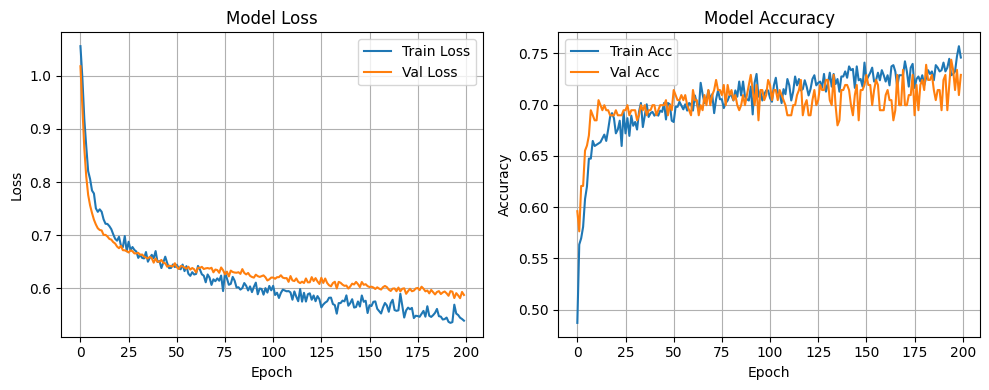

In [19]:
# Step 9: Visualize training

import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# ------------------------------------------------------------------
# Plot 1: Loss (Left Graph)
# ------------------------------------------------------------------
# Plot Training Loss if available
if 'train_loss' in class_history:
    ax1.plot(class_history['train_loss'], label='Train Loss')

# Plot Validation Loss
ax1.plot(class_history['val_loss'], label='Val Loss')

ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# ------------------------------------------------------------------
# Plot 2: Accuracy (Right Graph)
# ------------------------------------------------------------------
# Plot Training Accuracy if available
if 'train_accuracy' in class_history:
    ax2.plot(class_history['train_accuracy'], label='Train Acc')

# Plot Validation Accuracy
ax2.plot(class_history['val_accuracy'], label='Val Acc')

ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

If your code is correct you should see two side-by-side plots showing `Model Loss` on the left and `Model Accuracy` on the right.

## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **---WARNING---WARNING--WARNING---**

Unlike class lessons, you are **only given 1 submission** for assignments. If you failed to carefully follow directions and make a bad mistake you won't have a 2nd chance to correct your errors.

Therefore, you are **STRONGLY ENCOURAGED** to have your completed assignment checked by an Instructor **_before_** you submit your PDF to Canvas. Every semester one (or more) students fail to follow directions and receive an automatic `0` on an assignment--which virtually assures that the student just had their final course grade lower by a letter. Don't be that student!

## **Poly-A Tail**

## **DeepSeek**

![__](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/DeepSeek_logo.svg/1920px-DeepSeek_logo.svg.png)

**DeepSeek** (Chinese: 深度求索; pinyin: Shēndù Qiúsuǒ) is a Chinese artificial intelligence company that develops open-source large language models (LLMs). Based in Hangzhou, Zhejiang, it is owned and funded by Chinese hedge fund High-Flyer, whose co-founder, Liang Wenfeng, established the company in 2023 and serves as its CEO.

The DeepSeek-R1 model provides responses comparable to other contemporary large language models, such as OpenAI's GPT-4o and o1. It is trained at a significantly lower cost—stated at US$6 million compared to $100 million for OpenAI's GPT-4 in 2023—and approximately a tenth of the computing power used for Meta's comparable model, LLaMA 3.1. DeepSeek's AI models were developed amid United States sanctions on China and other countries for chips used to develop artificial intelligence, which were intended to restrict the ability of these countries to develop advanced AI systems. Lesser restrictions were later announced that would affect all but a few countries.

On 10 January 2025, DeepSeek released its first free chatbot app, based on the DeepSeek-R1 model, for iOS and Android; by 27 January, DeepSeek had surpassed ChatGPT as the most-downloaded free app on the iOS App Store in the United States,[10] causing Nvidia's share price to drop by 18%. DeepSeek's success against larger and more established rivals has been described as "upending AI"[10] and ushering in "a new era of AI brinkmanship". DeepSeek's compliance with Chinese government censorship policies and its data collection practices have also raised concerns over privacy and information control in the model, prompting regulatory scrutiny in multiple countries.

DeepSeek makes its generative artificial intelligence algorithms, models, and training details open-source, allowing its code to be freely available for use, modification, viewing, and designing documents for building purposes.However, reports indicate that the API version hosted in China applies content restrictions in accordance with local regulations, limiting responses on topics such as the Tiananmen Square massacre and Taiwan’s status. The company reportedly vigorously recruits young AI researchers from top Chinese universities, and hires from outside the computer science field to diversify its models' knowledge and abilities.

**Background**

In February 2016, High-Flyer was co-founded by AI enthusiast Liang Wenfeng, who had been trading since the 2007–2008 financial crisis while attending Zhejiang University. They began stock-trading with a deep learning model running on GPU on October 21, 2016. Prior to this, they used CPU-based models, mainly linear models. Most trading was done by AI by the end of 2017.

By 2019, he established High-Flyer as a hedge fund focused on developing and using AI trading algorithms. By 2021, High-Flyer exclusively used AI in trading, often using Nvidia chips. DeepSeek has made its generative artificial intelligence chatbot open source, meaning its code is freely available for use, modification, and viewing. This includes permission to access and use the source code, as well as design documents, for building purposes.

In 2021, while running High-Flyer, Liang began stockpiling Nvidia GPUs for an AI project.[20] According to 36Kr, Liang had built up a store of 10,000 Nvidia A100 GPUs, which are used to train AI, before the United States federal government imposed AI chip restrictions on China.

On 14 April 2023,[22] High-Flyer announced the start of an artificial general intelligence lab dedicated to research developing AI tools separate from High-Flyer's financial business. Incorporated on 17 July 2023, with High-Flyer as the investor and backer, the lab became its own company, DeepSeek. Venture capital firms were reluctant to provide funding, as they considered it unlikely that the venture would be able to generate an "exit" in a short period of time.

On May 16, 2023, the company Beijing DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. incorporated under the control of Hangzhou DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. As of May 2024, Liang Wenfeng held 84% of DeepSeek through two shell corporations.

After releasing DeepSeek-V2 in May 2024, which offered strong performance for a low price, DeepSeek became known as the catalyst for China's AI model price war. It was quickly dubbed the "Pinduoduo of AI", and other major tech giants such as ByteDance, Tencent, Baidu, and Alibaba began to cut the price of their AI models to compete with the company. Despite the low price charged by DeepSeek, it was profitable compared to its rivals that were losing money.

DeepSeek is focused on research and has no detailed plans for commercialization, which also allows its technology to avoid the most stringent provisions of China's AI regulations, such as requiring consumer-facing technology to comply with the government's controls on information.

DeepSeek's hiring preferences target technical abilities rather than work experience, resulting in most new hires being either recent university graduates or developers whose AI careers are less established. Likewise, the company recruits individuals without any computer science background to help its technology understand other topics and knowledge areas, including being able to generate poetry and perform well on the notoriously difficult Chinese college admissions exams (Gaokao).

**Training framework**

High-Flyer/DeepSeek has built at least two computing clusters, Fire-Flyer (萤火一号) and Fire-Flyer 2 (萤火二号). Fire-Flyer began construction in 2019 and finished in 2020, at a cost of 200 million yuan. It contained 1,100 GPUs interconnected at a rate of 200 Gbps. It was 'retired' after 1.5 years in operation. Fire-Flyer 2 began construction in 2021 with a budget of 1 billion yuan.[18] It was reported that in 2022, Fire-Flyer 2's capacity had been utilized at over 96%, totaling 56.74 million GPU hours. Of those GPU hours, 27% was used to support scientific computing outside the company.

Fire-Flyer 2 consisted of co-designed software and hardware architecture. On the hardware side, there are more GPUs with 200 Gbps interconnects. The cluster is divided into two "zones", and the platform supports cross-zone tasks. The network topology was two fat trees, chosen for its high bisection bandwidth. On the software side, there are

* **3FS (Fire-Flyer File System):** A distributed parallel file system. It was specifically designed for asynchronous random reads from a dataset, and uses Direct I/O and RDMA Read. In contrast to standard Buffered I/O, Direct I/O does not cache data. Caching is useless for this case, since each data read is random, and would not be reused.
* **hfreduce:** Library for asynchronous communication, originally designed to replace Nvidia Collective Communication Library (NCCL).[30] It was mainly used for allreduce, especially of gradients during backpropagation. It is asynchronously run on the CPU to avoid blocking kernels on the GPU.[28] It uses two-tree broadcast like NCCL.
* **hfai.nn:** Software library of commonly used operators in neural network training, similar to torch.nn in PyTorch.
* **HaiScale Distributed Data Parallel (DDP):** Parallel training library that implements various forms of parallelism in deep learning such as Data Parallelism (DP), Pipeline Parallelism (PP), Tensor Parallelism (TP), Experts Parallelism (EP), Fully Sharded Data Parallel (FSDP) and Zero Redundancy Optimizer (ZeRO). It is similar to PyTorch DDP, which uses NCCL on the backend.
* **HAI Platform:** Various applications such as task scheduling, fault handling, and disaster recovery.
During 2022, Fire-Flyer 2 had 5000 PCIe A100 GPUs in 625 nodes, each containing 8 GPUs. At the time, they chose to exclusively use PCIe instead of DGX version of A100, since at the time the models they trained could fit within a single 40 GB GPU VRAM, so there was no need for the higher bandwidth of DGX (i.e. they required only data parallelism but not model parallelism).[30] Later, they also incorporated NVLinks and NCCL, to train larger models that required model parallelism.